In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv('insurance.csv')

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.shape

(1338, 7)

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
data.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [16]:
data.duplicated().sum()

1

In [17]:
for i in data.columns:
    if data[i].dtype=="object":
        print(data[i].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

for i in data.columns:
    if data[i].dtype=="object":
        data[i]=label.fit_transform(data[i])


data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


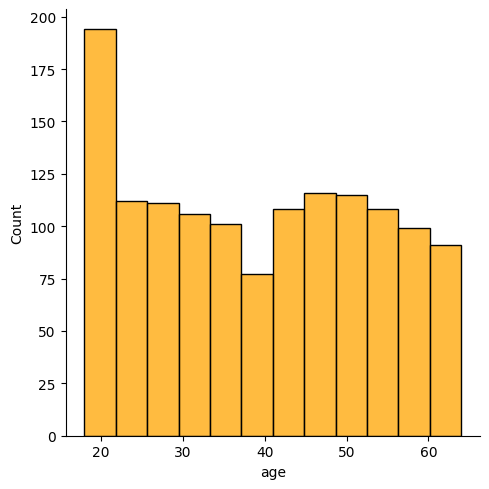

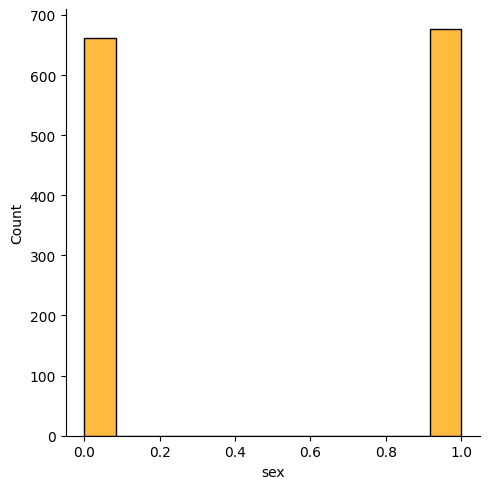

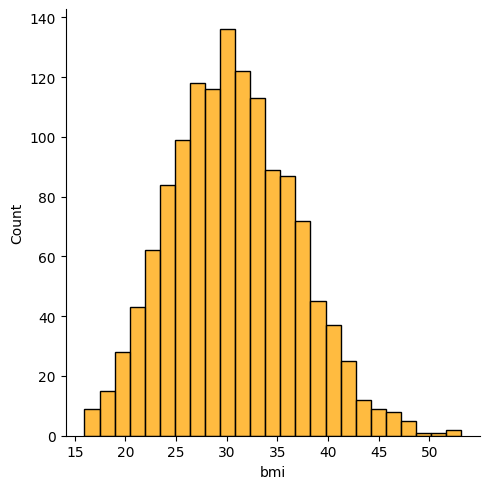

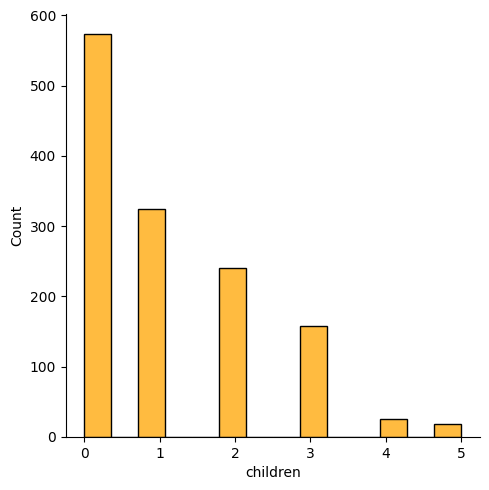

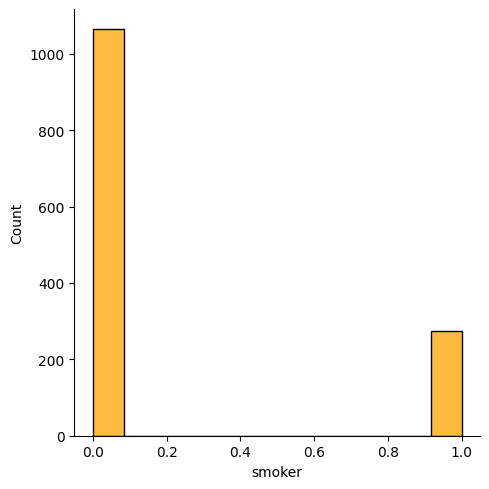

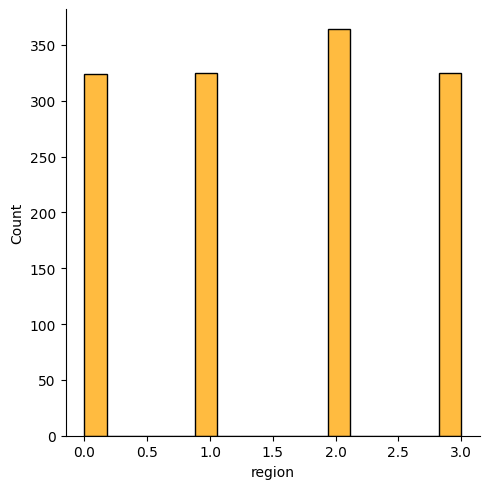

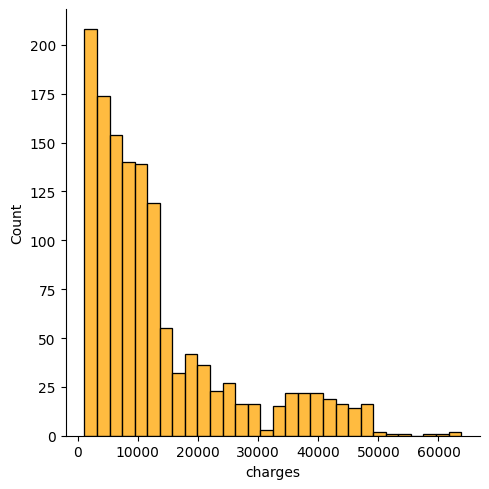

In [19]:
for i in data.columns:
    sns.displot(data[i], color="orange")
    plt.show()

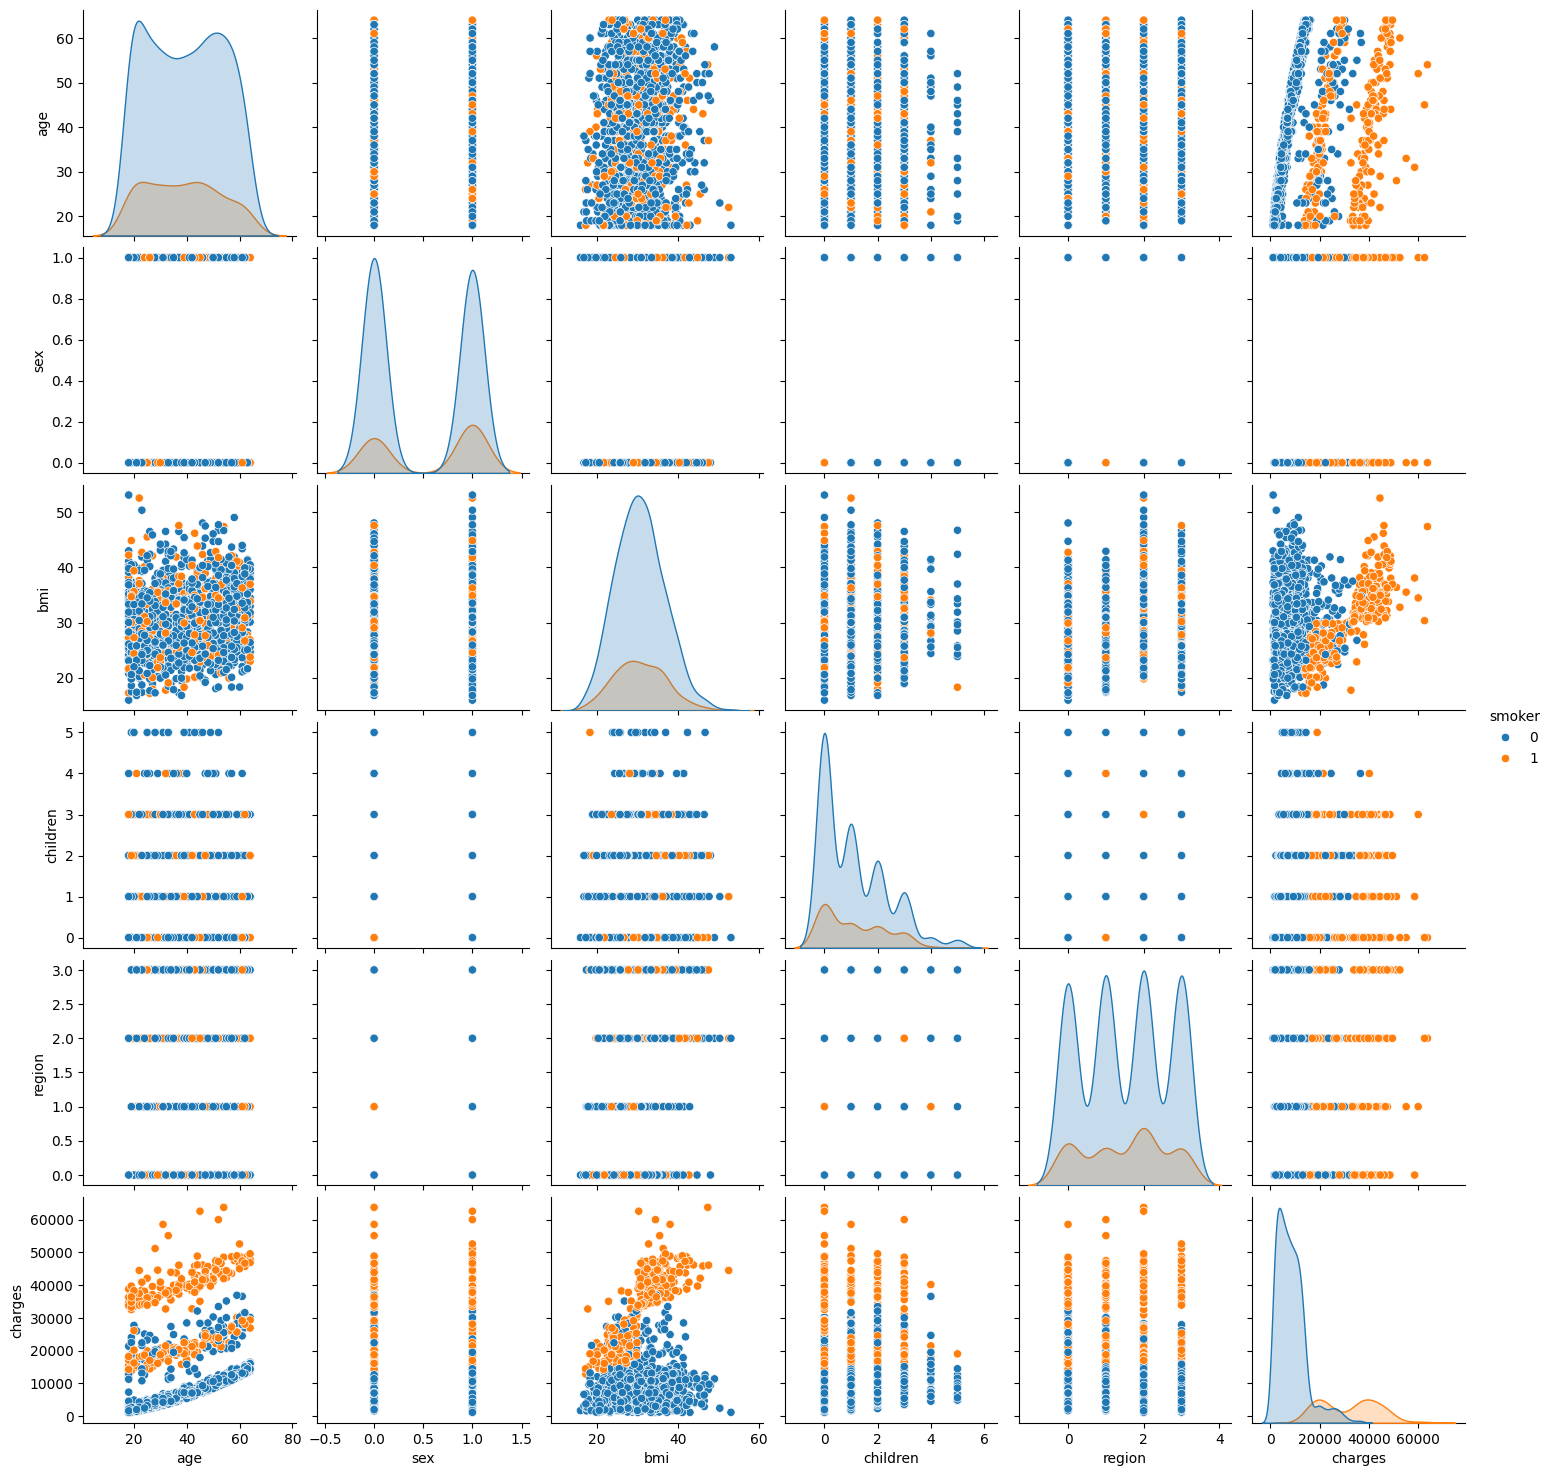

In [20]:
sns.pairplot(data=data,hue='smoker')

<Axes: >

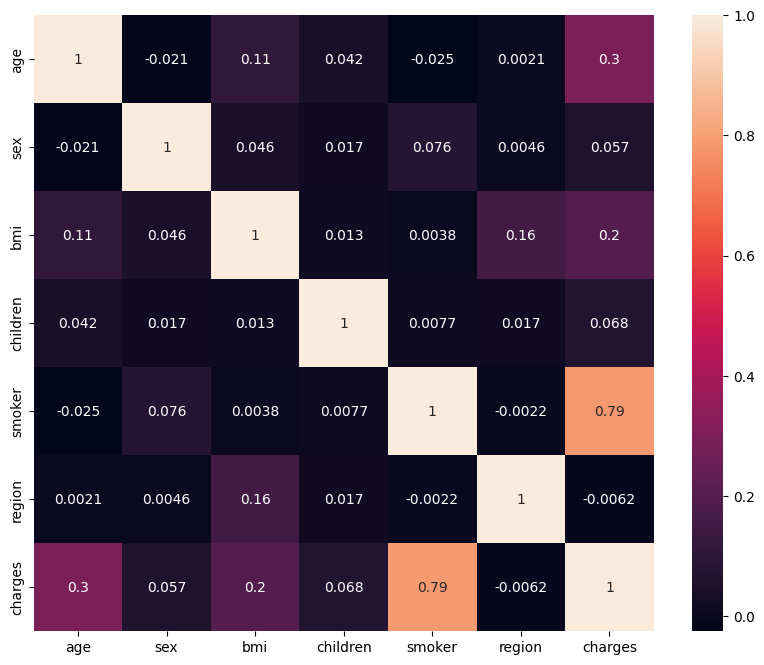

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

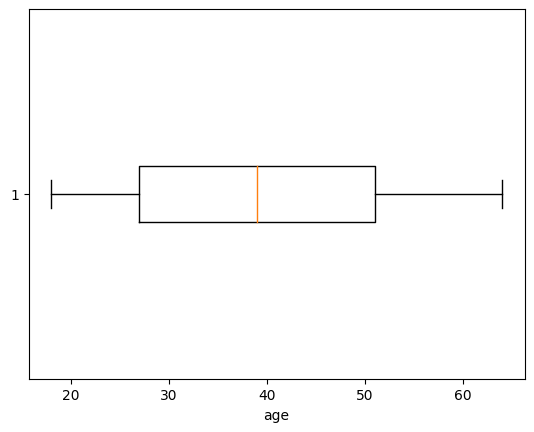

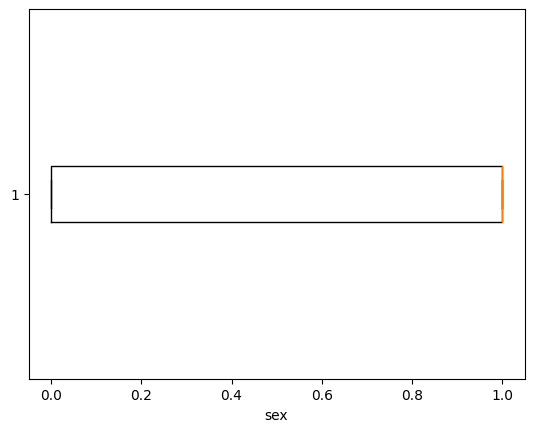

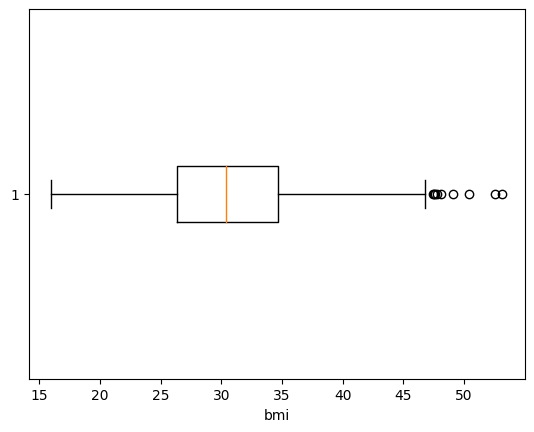

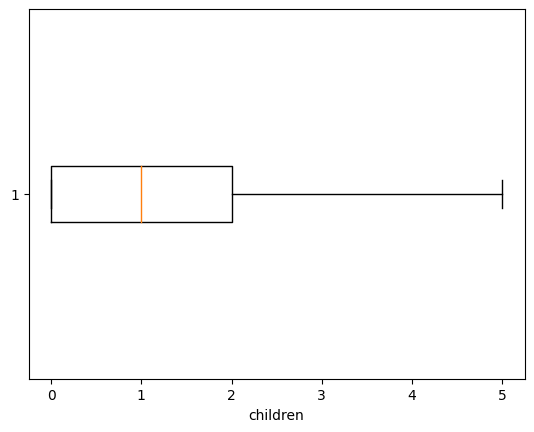

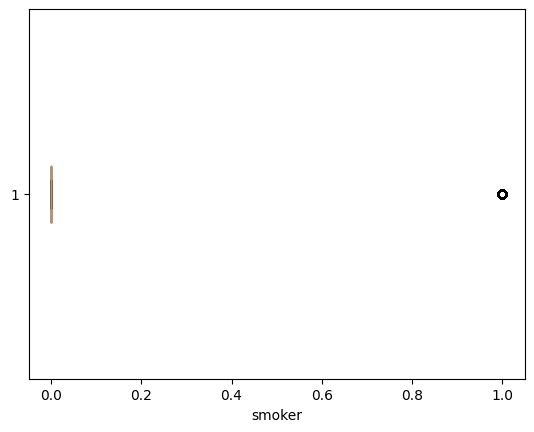

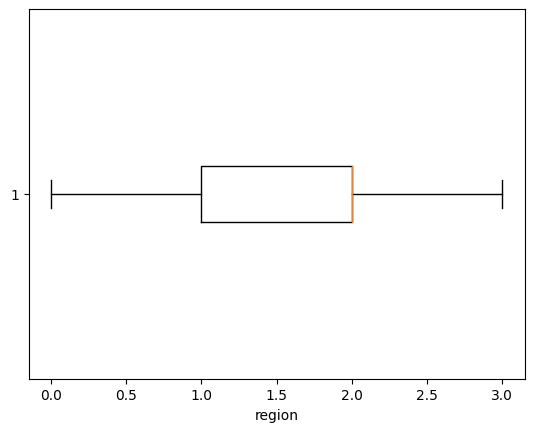

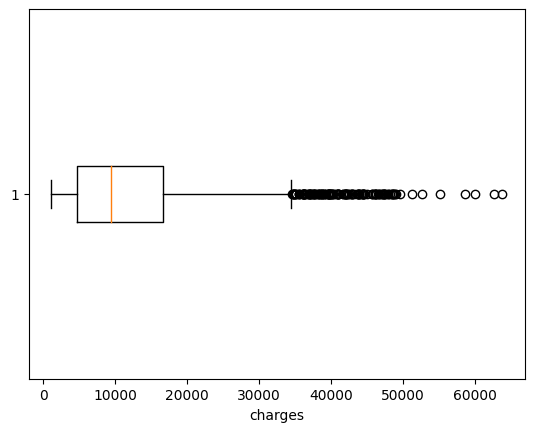

In [22]:
for i in data.columns:
    plt.boxplot(data[i],vert=False)
    plt.xlabel(i)
    plt.show()

In [23]:
q1=np.quantile(data['bmi'],0.25)
q2=np.quantile(data['bmi'],0.50)
q3=np.quantile(data['bmi'],0.75)
q4=np.quantile(data['bmi'],1)

iqr=q3-q1

lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print('lower_fence',lower_fence)
print('upper_fence', upper_fence)

lower_fence 13.7
upper_fence 47.290000000000006


<Axes: xlabel='bmi'>

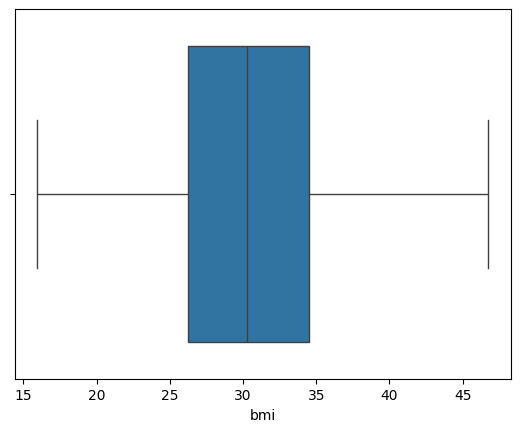

In [24]:
df=data.loc[(data["bmi"]<upper_fence) & (data["bmi"]>lower_fence)]
sns.boxplot(data=df , x="bmi")

In [25]:
x=data.drop(['charges'], axis=1)
y=data['charges']

In [26]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x)
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [29]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2, random_state=2)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((267, 6), (1071, 6), (267,), (1071,))

In [30]:
#Linear regression

from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [31]:
print('valeu of slope =', linear.coef_)
print('valeu of intercept=', linear.intercept_)

valeu of slope = [  254.79036242   300.2123131    270.72453576   470.42277672
 20889.50589868  -324.08072371]
valeu of intercept= -10081.932822412573


In [32]:
traning_predict=linear.predict(x_train)

# traning score
from sklearn.metrics import r2_score
train_r2_score=r2_score(y_train, traning_predict)
print('traning_acc_score=' , train_r2_score)

traning_acc_score= 0.7043663613576312


In [33]:
y_pridect=linear.predict(x_test)

In [34]:
l_train=linear.score(x_train,y_train)
l_test=linear.score(x_test,y_test)
print(['linear_training_accu',l_train, 'linear_testing_accu', l_test])

['linear_training_accu', 0.7043663613576312, 'linear_testing_accu', 0.7434583092302811]


In [35]:
linear.score(x_test,y_test)

0.7434583092302811

In [36]:
#Performance metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse=mean_squared_error
mae=mean_absolute_error
r2_score=r2_score

In [37]:
print('mse=',mse(y_test,y_pridect))
print('mae=',mae(y_test,y_pridect))
print('r2_score=',r2_score(y_test,y_pridect))
print('rmse= ', mse(y_test, y_pridect,squared=False))

mse= 39718539.897299565
mae= 4205.440501772082
r2_score= 0.7434583092302811
rmse=  6302.264664174265


In [38]:
print('twsting_r2_score')

twsting_r2_score


Text(0, 0.5, 'real_data')

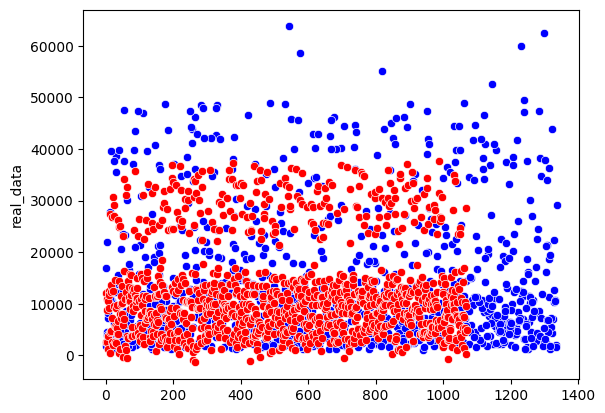

In [39]:
sns.scatterplot(y_test, color= "blue")
sns.scatterplot(y_pridect, color= "red")

plt.ylabel('real_data')

In [40]:
real_pridect=y_test-y_pridect

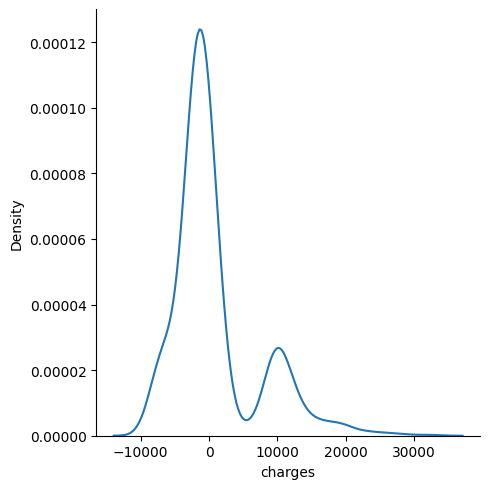

In [41]:
sns.displot(real_pridect, kind= "kde")

In [42]:
#Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train , y_train)

Lasso()

In [43]:
print('slope_value', lasso.coef_)
print('intersecp', lasso.intercept_)

slope_value [  254.7717688    296.58857514   270.67348059   469.77720154
 20883.71043184  -323.21937065]
intersecp -10077.238561429162


In [44]:
laso_tra=lasso.score(x_train,y_train)
laso_test=lasso.score(x_test,y_test)
print(['lasso_traing_acc=', laso_tra , 'lasso_testing_acc=', laso_test])

['lasso_traing_acc=', 0.704366263931397, 'lasso_testing_acc=', 0.7434151895727146]


In [45]:
laso_prdct=lasso.predict(x_test)

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse=mean_squared_error
mae=mean_absolute_error
r2_score=r2_score


print('mse=', mse(y_test,laso_prdct))
print('mae=', mae(y_test,laso_prdct))
print('r2_sore=', r2_score(y_test,laso_prdct))
print('rmse= ', mse(y_test, laso_prdct,squared=False))

mse= 39725215.80964067
mae= 4205.810199504796
r2_sore= 0.7434151895727146
rmse=  6302.794285841849


<Axes: ylabel='charges'>

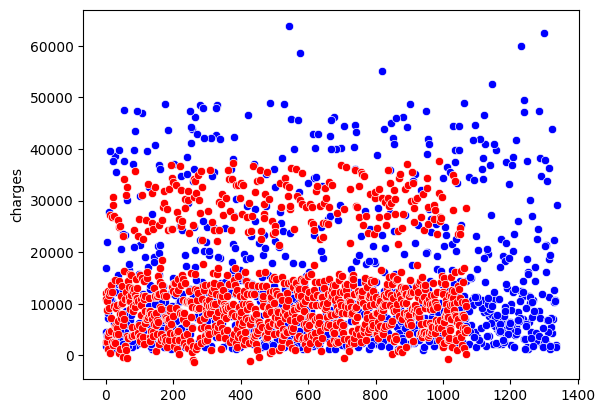

In [47]:
sns.scatterplot(y_test, color="blue")
sns.scatterplot(laso_prdct, color="red")

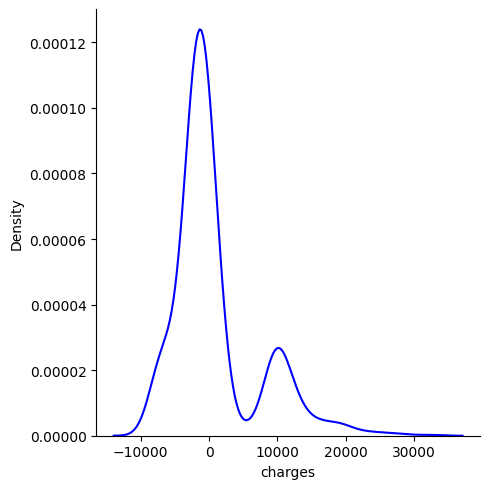

In [48]:
sns.displot(y_test-laso_prdct , color="blue" , kind="kde")

In [49]:
#Elastic net
from sklearn.linear_model import ElasticNet
ela_net=ElasticNet()
ela_net.fit(x_train, y_train)

ElasticNet()

In [50]:
print('ElasticNet_coef-', ela_net.coef_)
print('elatocNet_intercept-', ela_net.intercept_)

ElasticNet_coef- [ 218.95373496  540.30253276  142.67465527  515.39588709 5005.20870535
 -298.81211024]
elatocNet_intercept- -1815.1308300145374


In [51]:
ela_tra=ela_net.score(x_train,y_train)
ela_test=ela_net.score(x_test,y_test)
print(['elasticnet_traning_acc', ela_tra,'elasticnet_testing_acc' , ela_test])

['elasticnet_traning_acc', 0.35214077218883955, 'elasticnet_testing_acc', 0.34299856453777144]


In [52]:
ela_pre=ela_net.predict(x_test)

In [53]:
print('elasticnet_mse-',mse(y_test,ela_pre))
print('elasticnet_mae-',mae(y_test,ela_pre))
print('elasticnet_r_score-',r2_score(y_test,ela_pre))

elasticnet_mse- 101718896.6389621
elasticnet_mae- 7394.468666087073
elasticnet_r_score- 0.34299856453777144


In [63]:
print('linear_reg',['linear_training_accu',[l_train], 'linear_testing_accu', [l_test]])
print('lasso',['lasso_traing_acc=', [laso_tra] , 'lasso_testing_acc=', [laso_test]])
print('elasticnet',['elasticnet_traning_acc', [ela_tra],'elasticnet_testing_acc' , [ela_test]])


linear_reg ['linear_training_accu', [0.7043663613576312], 'linear_testing_accu', [0.7434583092302811]]
lasso ['lasso_traing_acc=', [0.704366263931397], 'lasso_testing_acc=', [0.7434151895727146]]
elasticnet ['elasticnet_traning_acc', [0.35214077218883955], 'elasticnet_testing_acc', [0.34299856453777144]]


In [64]:
crossval_mse=cross_val_score(lasso,x_train,y_train, scoring="neg_mean_squared_error" , cv=10)

In [65]:
np.mean(crossval_mse)

-35728313.91329593

In [66]:
cross_r2=crossval_mse=cross_val_score(lasso,x_train,y_train, scoring="r2" , cv=5)
np.mean(cross_r2)

0.6873548239160652

In [67]:
inp_data=(32,1,27.75,0,2,0)

inp_data_np_array=np.asarray(inp_data)

reshape_data=inp_data_np_array.reshape(1,-1)

predict=linear.predict(reshape_data)
predict_lasso=lasso.predict(reshape_data)

import math

print('the insurance cost ids =' ,math.trunc (predict[0]))
print('the insurance cost ids =' ,math.trunc (predict_lasso[0]))

the insurance cost ids = 47663
the insurance cost ids = 47650
